### Required Imports

In [1]:
import numpy as np
import pandas as pd
import os, sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# for feature engineering
from scipy import stats
from scipy.stats import skew, kurtosis
import itertools
import shap

c:\Users\chery\anaconda3\envs\ml_ds\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Read the data
df = pd.read_csv('parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


### Data Exploration

In [5]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [6]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [7]:
print(f"Dataset shape: {df.shape}")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Duplicate rows: {df.duplicated().sum()}")

Dataset shape: (195, 24)
Missing values: 0
Duplicate rows: 0


In [8]:
# Class Distribution of the target column
print(f"Class Balance: {df['status'].value_counts(normalize=True)}")

Class Balance: status
1    0.753846
0    0.246154
Name: proportion, dtype: float64


In [9]:
# in this case, 'status' is our target column and rest of the columns are features
# get the features and labels
features = df.loc[:, df.columns != 'status'].values[:,1:]
labels = df.loc[:,'status'].values

In [10]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
# since the column only consist of 0 and 1, we can get the count of these labels
print("Count of Ones:", labels[labels == 1].shape[0])
print("Count of Zeroes:", labels[labels == 0].shape[0])

Count of Ones: 147
Count of Zeroes: 48


### Exploratory Data Analysis

In [12]:
plt.figure(figsize=(20, 15))

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

Text(0.5, 1.0, 'Feature Correlation Matrix')

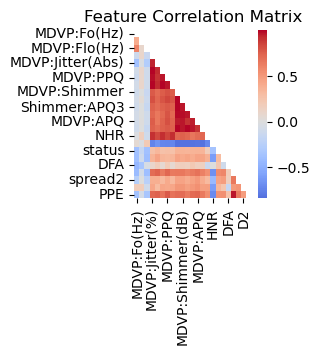

In [13]:
# correlation heatmap
plt.subplot(2, 3, 1)
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')

Text(0.5, 1.0, 'Target Variable Distribution')

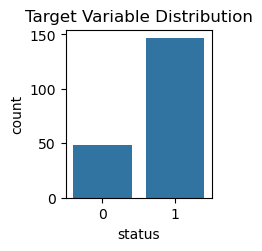

In [14]:
# Target Variable Distribution
plt.subplot(2, 3, 2)
sns.countplot(data=df, x='status')
plt.title('Target Variable Distribution')

Text(0.5, 1.0, 'Top 15 Feature Importances')

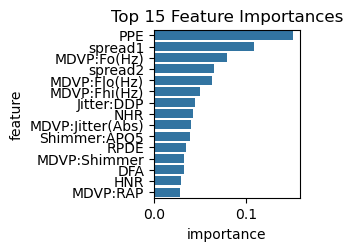

In [22]:
# plotting feature importance with current set of features
plt.subplot(2, 3, 4)
X = df.drop(['name', 'status'], axis=1)
y = df['status']
rf_temp = RandomForestClassifier(n_estimators=100, random_state=42)
rf_temp.fit(X, y)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_temp.feature_importances_
}).sort_values('importance', ascending=False).head(15)
        
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Top 15 Feature Importances')

Text(0.5, 1.0, 'PCA Visualization')

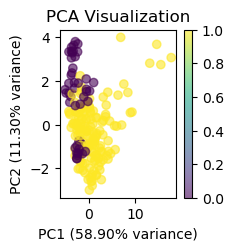

In [23]:
plt.subplot(2, 3, 5)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(StandardScaler().fit_transform(X))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.6)
plt.colorbar(scatter)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('PCA Visualization')

From the above plot, we're able to see yellow dots (Healthy patients) and purple dots(Parkinson's patients) forming separate clusters. 

While there is clear separation on some parts, there are some areas we can see the colors being mixed together. This indicates the need for some feature engineering.

### Initial Pre-processing and Model Evaluation

In [15]:
# scaling the features to exist between 1 and -1
scaler = MinMaxScaler((-1,1))
x = scaler.fit_transform(features)
y = labels

In [16]:
# split into 80-20 train test ration
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, train_size=0.8, random_state=7)

In [17]:
model = XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [18]:
y_pred = model.predict(x_test)
print("Accuracy achieved:", accuracy_score(y_test,y_pred)*100)

Accuracy achieved: 94.87179487179486


current accuracy achieved with basic preprocessing and training is 94.8%

### Feature Engineering

In [25]:
df_features = df.copy()

In [26]:
# Create ratio-based features
# these can be considered as voice instability indicators
df_features['jitter_shimmer_ratio'] = df_features['MDVP:Jitter(%)'] / df_features['MDVP:Shimmer']
df_features['jitter_rap_ratio'] = df_features['MDVP:Jitter(%)'] / df_features['MDVP:RAP']
df_features['shimmer_apq_ratio'] = df_features['MDVP:Shimmer'] / df_features['MDVP:APQ']

In [29]:
df_features['d2_dda_ratio'] = df_features['spread1'] / df_features['spread2']
df_features['ppe_dfa_ratio'] = df_features['PPE'] / df_features['DFA']

In [27]:
#Voice perturbation combinations
df_features['total_jitter'] = (df_features['MDVP:Jitter(%)'] + 
                               df_features['MDVP:Jitter(Abs)'] + 
                               df_features['MDVP:RAP'] + 
                               df_features['MDVP:PPQ'])
        
df_features['total_shimmer'] = (df_features['MDVP:Shimmer'] + 
                                df_features['MDVP:Shimmer(dB)'] + 
                                df_features['MDVP:APQ'] + 
                                df_features['Shimmer:APQ3'] + 
                                df_features['Shimmer:APQ5'])

In [28]:
df_features['voice_quality_index'] = (df_features['MDVP:Fo(Hz)'] * df_features['HNR']) / \
                                           (df_features['total_jitter'] * df_features['total_shimmer'] + 1)

In [37]:
df_features

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,D2,PPE,jitter_shimmer_ratio,jitter_rap_ratio,shimmer_apq_ratio,total_jitter,total_shimmer,voice_quality_index,d2_dda_ratio,ppe_dfa_ratio
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,2.301442,0.284654,0.179241,2.118919,1.472232,0.01715,0.55257,2500.099356,-18.061374,0.349147
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,2.486855,0.368674,0.157809,2.081720,1.404304,0.02137,0.80754,2296.375156,-12.143365,0.449865
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,2.342259,0.332634,0.200650,1.930147,1.457660,0.02384,0.63638,2373.589545,-14.278806,0.403052
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,2.405554,0.368975,0.181537,1.986056,1.455992,0.02206,0.67893,2373.116710,-12.322424,0.450390
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,2.332180,0.410335,0.199844,1.960305,1.438970,0.02858,0.77605,2230.096638,-15.981148,0.498291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,2.657476,0.133050,0.112307,1.745247,1.488889,0.00984,0.52166,3382.265572,-53.616062,0.202235
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,2.784312,0.168895,0.205016,1.703927,1.464077,0.01190,0.34191,3995.346868,-47.913235,0.247196
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,2.679772,0.131728,0.589255,2.179487,1.384523,0.02556,0.32208,3098.438032,-42.834134,0.200902
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,2.138608,0.123306,0.322300,2.000000,1.445844,0.01504,0.30570,3763.189160,-32.511193,0.191482


Added a total of 8 columns extra

### Advanced Preprocessing

In [35]:
def advanced_preprocessing(df_enhanced):
        """Advanced preprocessing with feature selection"""
        # Separate features and target
        X = df_enhanced.drop(['name', 'status'], axis=1)
        y = df_enhanced['status']
        
        # Handle infinite values
        X = X.replace([np.inf, -np.inf], np.nan)
        X = X.fillna(X.median())
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        
        # Advanced scaling (robust to outliers)
        scaler = RobustScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Feature selection using multiple methods
        print("=== FEATURE SELECTION ===")
        
        # 1. Statistical feature selection
        selector_stat = SelectKBest(score_func=f_classif, k=20)
        X_train_stat = selector_stat.fit_transform(X_train_scaled, y_train)
        X_test_stat = selector_stat.transform(X_test_scaled)
        
        # 2. Recursive feature elimination
        rf_selector = RandomForestClassifier(n_estimators=100, random_state=42)
        selector_rfe = RFE(rf_selector, n_features_to_select=20)
        X_train_rfe = selector_rfe.fit_transform(X_train_scaled, y_train)
        X_test_rfe = selector_rfe.transform(X_test_scaled)
        
        # Store the best feature selection method (using statistical for now)
        feature_selector = selector_stat
        feature_names = X.columns[selector_stat.get_support()]
        
        print(f"Selected {len(feature_names)} features:")
        print(list(feature_names))
        
        return X_train_stat, X_test_stat, y_train, y_test

In [36]:
df_enhanced = df_features.copy()
# Advanced preprocessing
X_train, X_test, y_train, y_test = advanced_preprocessing(df_enhanced)

=== FEATURE SELECTION ===
Selected 20 features:
['MDVP:Fo(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(Abs)', 'MDVP:PPQ', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'HNR', 'RPDE', 'spread1', 'spread2', 'D2', 'PPE', 'total_jitter', 'total_shimmer', 'voice_quality_index', 'ppe_dfa_ratio']


### Ensemble Model Training

In [38]:
def train_ensemble_models(self, X_train, X_test, y_train, y_test):
    """Train multiple models and create ensemble"""
    models = {
        'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42),
        'XGBoost': xgb.XGBClassifier(random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'SVM': SVC(probability=True, random_state=42),
        'Logistic Regression': LogisticRegression(random_state=42)
    }
        
    # Hyperparameter tuning for best models
    param_grids = {
        'Random Forest': {
            'n_estimators': [100, 200, 300],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        },
        'XGBoost': {
            'n_estimators': [100, 200],
            'max_depth': [3, 6, 9],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.8, 1.0]
        }
    }
        
    print("=== MODEL TRAINING AND EVALUATION ===")
        
    for name, model in models.items():
        print(f"\nTraining {name}...")
            
        # Hyperparameter tuning for selected models
        if name in param_grids:
            grid_search = GridSearchCV(
                model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1
            )
            grid_search.fit(X_train, y_train)
            model = grid_search.best_estimator_
            print(f"Best parameters: {grid_search.best_params_}")
        else:
            model.fit(X_train, y_train)
            
        # Predictions
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
            
        # Metrics
        accuracy = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred_proba)
        cv_scores = cross_val_score(model, X_train, y_train, cv=5)
            
        results[name] = {
            'model': model,
            'accuracy': accuracy,
            'auc': auc,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'y_pred': y_pred,
            'y_pred_proba': y_pred_proba
        }
            
        print(f"Accuracy: {accuracy:.4f}")
        print(f"AUC: {auc:.4f}")
        print(f"CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")
        
    # Select best model
    best_model_name = max(results.keys(), key=lambda k: results[k]['auc'])
    best_model = results[best_model_name]['model']
        
    print(f"\n=== BEST MODEL: {best_model_name} ===")
    print(f"AUC: {results[best_model_name]['auc']:.4f}")
        
    return y_test